In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(x_train,y_train), (x_test,y_test) = keras.datasets.mnist.load_data()
x_train = x_train/255.0
x_test = x_test/255.0
x_train.shape

(60000, 28, 28)

In [3]:
model = keras.Sequential()

In [4]:
model.add(keras.layers.Flatten(input_shape=(28,28)))

In [5]:
model.add(keras.layers.Dense(100, activation = 'relu'))
model.add(keras.layers.Dense(100, activation = 'relu'))
model.add(keras.layers.Dense(100, activation = 'relu'))
model.add(keras.layers.Dense(10, activation = 'sigmoid'))

In [6]:
model.compile(optimizer='adam',metrics=['accuracy'],loss='sparse_categorical_crossentropy')

In [7]:
model.fit(x_train,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 948us/step - loss: 0.2423 - accuracy: 0.9269
Epoch 2/10
1875/1875 [==============================] - 2s 924us/step - loss: 0.1078 - accuracy: 0.9674
Epoch 3/10
1875/1875 [==============================] - 2s 911us/step - loss: 0.0757 - accuracy: 0.9768
Epoch 4/10
1875/1875 [==============================] - 2s 910us/step - loss: 0.0603 - accuracy: 0.9808
Epoch 5/10
1875/1875 [==============================] - 2s 924us/step - loss: 0.0493 - accuracy: 0.9836
Epoch 6/10
1875/1875 [==============================] - 2s 915us/step - loss: 0.0425 - accuracy: 0.9859
Epoch 7/10
1875/1875 [==============================] - 2s 916us/step - loss: 0.0342 - accuracy: 0.9890
Epoch 8/10
1875/1875 [==============================] - 2s 922us/step - loss: 0.0317 - accuracy: 0.9896
Epoch 9/10
1875/1875 [==============================] - 2s 906us/step - loss: 0.0292 - accuracy: 0.9903
Epoch 10/10
1875/1875 [==============================] - 2s 931u

In [8]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 0s 650us/step - loss: 0.0909 - accuracy: 0.9773


[0.09088209271430969, 0.9772999882698059]

In [9]:
y_predict = model.predict(x_test)

313/313 [==============================] - 0s 543us/step


In [10]:
np.argmax(y_predict[0])

7

In [11]:
y_test[0]

7

In [12]:
    y_predicted = [np.argmax(i) for i in y_predict]
    cf = tf.math.confusion_matrix(labels=y_test, predictions = y_predicted)
    cf

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 973,    0,    0,    1,    0,    0,    3,    1,    2,    0],
       [   0, 1129,    1,    0,    0,    1,    2,    0,    2,    0],
       [   1,    0, 1020,    0,    4,    0,    3,    2,    2,    0],
       [   0,    0,    1,  993,    0,    4,    0,    2,   10,    0],
       [   0,    1,    1,    0,  970,    0,    5,    2,    0,    3],
       [   2,    0,    0,   16,    1,  853,    6,    1,   12,    1],
       [   3,    3,    0,    0,    4,    4,  942,    0,    2,    0],
       [   0,    6,   10,    4,    2,    0,    0,  999,    2,    5],
       [   2,    0,    8,    3,    3,    2,    1,    3,  950,    2],
       [   2,    4,    1,    7,   33,    3,    0,    8,   10,  941]])>

Text(95.72222222222221, 0.5, 'Truth')

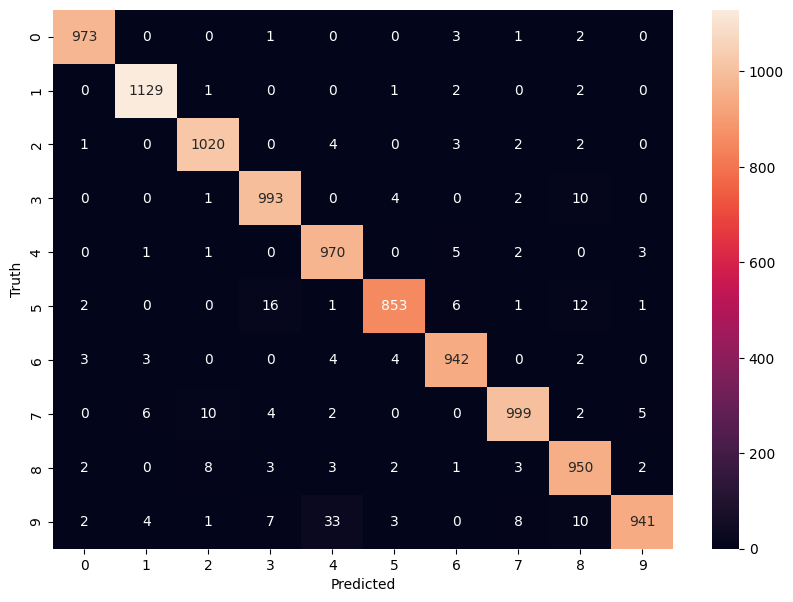

In [13]:
# !pip install seaborn
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cf,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')